In [1]:
import pandas as pd
from mlxtend.frequent_patterns import apriori,association_rules
groceries = []
# As the file is in transaction data we will be reading data directly 
with open("../Association rules/groceries.csv") as f:
    groceries = f.read()


In [2]:
groceries = groceries.split("\n")
groceries_list = []
for i in groceries:
    groceries_list.append(i.split(","))

In [8]:
all_groceries_list = [i for item in groceries_list for i in item]
from collections import Counter
item_frequencies = Counter(all_groceries_list)
# after sorting
#item_frequencies = sorted(item_frequencies.items(),key = lambda x:x[1])
item_frequencies = sorted(item_frequencies.items(),key = lambda x:x[1])
print(item_frequencies)

[('baby food', 1), ('sound storage medium', 1), ('', 1), ('preservation products', 2), ('bags', 4), ('kitchen utensil', 4), ('baby cosmetics', 6), ('frozen chicken', 6), ('toilet cleaner', 7), ('make up remover', 8), ('salad dressing', 8), ('whisky', 8), ('liqueur', 9), ('rubbing alcohol', 10), ('hair spray', 11), ('frozen fruits', 12), ('cream', 13), ('honey', 15), ('decalcifier', 15), ('organic products', 16), ('specialty vegetables', 17), ('ready soups', 18), ('flower soil/fertilizer', 19), ('prosecco', 20), ('cocoa drinks', 22), ('organic sausage', 22), ('pudding powder', 23), ('tidbits', 23), ('cooking chocolate', 25), ('soap', 26), ('bathroom cleaner', 27), ('cookware', 27), ('potato products', 28), ('fish', 29), ('snack products', 30), ('nut snack', 31), ('artif. sweetener', 32), ('canned fruit', 32), ('syrup', 32), ('nuts/prunes', 33), ('abrasive cleaner', 35), ('skin care', 35), ('specialty fat', 36), ('tea', 38), ('brandy', 41), ('light bulbs', 41), ('meat spreads', 42), ('ke

In [4]:
frequencies = list(reversed([i[1] for i in item_frequencies]))
items = list(reversed([i[0] for i in item_frequencies]))


C:\Users\MAHESHWARI\Anaconda3\lib\site-packages\ipykernel_launcher.py:3: MatplotlibDeprecationWarning: Using a string of single character colors as a color sequence is deprecated. Use an explicit list instead.
  This is separate from the ipykernel package so we can avoid doing imports until


Text(0, 0.5, 'Count')

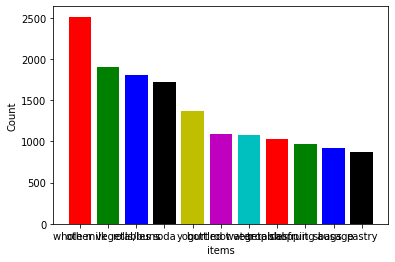

In [9]:
import matplotlib.pyplot as plt

plt.bar(height = frequencies[0:11],x = list(range(0,11)),color='rgbkymc')
plt.xticks(list(range(0,11),),items[0:11])
plt.xlabel("items")
plt.ylabel("Count")

In [12]:
# Purpose of converting all list into Series object Coz to treat each list element as entire element not to separate 
groceries_series  = pd.DataFrame(pd.Series(groceries_list))
groceries_series = groceries_series.iloc[:9835,:] # removing the last empty transaction

groceries_series.columns = ["transactions"]


C:\Users\MAHESHWARI\Anaconda3\lib\site-packages\ipykernel_launcher.py:7: MatplotlibDeprecationWarning: Using a string of single character colors as a color sequence is deprecated. Use an explicit list instead.
  import sys


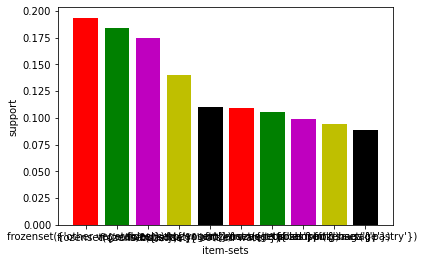

In [14]:
X = groceries_series['transactions'].str.join(sep='*').str.get_dummies(sep='*')

frequent_itemsets = apriori(X, min_support=0.005, max_len=3,use_colnames = True)

# Most Frequent item sets based on support 
frequent_itemsets.sort_values('support',ascending = False,inplace=True)
plt.bar(x = list(range(1,11)),height = frequent_itemsets.support[1:11],color='rgmyk');
plt.xticks(list(range(1,11)),frequent_itemsets.itemsets[1:11])
plt.xlabel('item-sets');plt.ylabel('support')

rules = association_rules(frequent_itemsets, metric="lift", min_threshold=1)
rules.head(20)
rules.sort_values('lift',ascending = False,inplace=True)


In [16]:
def to_list(i):
    return (sorted(list(i)))


ma_X = rules.antecedents.apply(to_list)+rules.consequents.apply(to_list)
ma_X = ma_X.apply(sorted)
rules_sets = list(ma_X)
unique_rules_sets = [list(m) for m in set(tuple(i) for i in rules_sets)]
index_rules = []
for i in unique_rules_sets:
    index_rules.append(rules_sets.index(i))

In [17]:
rules_no_redudancy  = rules.iloc[index_rules,:]

In [18]:
rules_no_redudancy.sort_values('lift',ascending=False).head(10)

,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction
2558,(ham),(white bread),0.026029,0.042095,0.005084,0.195312,4.639851,0.003988,1.190407
2022,(whipped/sour cream),"(butter, other vegetables)",0.071683,0.020031,0.005796,0.080851,4.036397,0.004360,1.066171
1313,(root vegetables),(herbs),0.108998,0.016268,0.007016,0.064366,3.956477,0.005243,1.051406
2042,"(other vegetables, root vegetables)",(onions),0.047382,0.031012,0.005694,0.120172,3.875044,0.004225,1.101338
2203,"(citrus fruit, pip fruit)",(tropical fruit),0.013828,0.104931,0.005592,0.404412,3.854060,0.004141,1.502831
777,(berries),(whipped/sour cream),0.033249,0.071683,0.009049,0.272171,3.796886,0.006666,1.275461
1469,"(whole milk, whipped/sour cream)",(butter),0.032232,0.055414,0.006711,0.208202,3.757185,0.004925,1.192963
2436,(yogurt),"(tropical fruit, curd)",0.139502,0.010269,0.005287,0.037901,3.690645,0.003855,1.028720
1043,(root vegetables),"(beef, other vegetables)",0.108998,0.019725,0.007931,0.072761,3.688692,0.005781,1.057197
1871,"(whole milk, domestic eggs)",(butter),0.029995,0.055414,0.005999,0.200000,3.609174,0.004337,1.180732
